In [67]:
!pip install opencv-python-headless

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
import cv2
import numpy as np
#from google.colab.patches import cv2_imshow


In [69]:
# Load YOLOv3 weights and configuration file
net = cv2.dnn.readNet("yolov3.weights", "yolov3.cfg")

In [70]:
# Load COCO class names
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]


In [71]:
# Define color for bounding boxes
colors = np.random.uniform(0, 255, size=(len(classes), 3))


In [103]:
# Load image
img = cv2.imread("Book_Mug.jpg")


In [104]:
# Get image dimensions
height, width, channels = img.shape

In [105]:
#Create input blob for neural network
blob = cv2.dnn.blobFromImage(img, 1/255.0, (416, 416), swapRB=True, crop=False)

# Set input blob as input for neural network
net.setInput(blob)

In [106]:
# Forward pass through neural network
outputs = net.forward(net.getUnconnectedOutLayersNames())


In [107]:
# Extract bounding boxes, confidence scores, and class IDs from outputs
boxes = []
confidences = []
class_ids = []
for output in outputs:
    for detection in output:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)
            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)


In [108]:
# Apply non-maximum suppression to remove overlapping bounding boxes
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)


In [109]:
# Draw bounding boxes and class labels on image
for i in indexes.flatten():
    x, y, w, h = boxes[i]
    label = str(classes[class_ids[i]])
    color = colors[class_ids[i]]
    cv2.rectangle(img, (x, y), (x + w, y + h), color, 2)
    cv2.putText(img, label, (x, y + 20), cv2.FONT_HERSHEY_SIMPLEX, 0.6, color, 2)


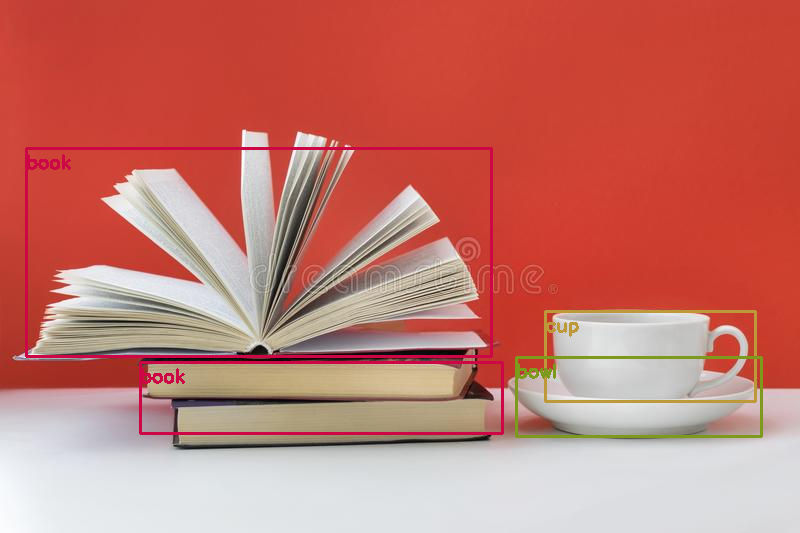

In [110]:
# Display output image
from google.colab.patches import cv2_imshow
cv2_imshow(img)

cv2.waitKey(0)
cv2.destroyAllWindows()